# Project 

12/22~26: 찐으로 플젝 1,2,5,6 풀고 완료될 때 마다 강사님께 ipynb파일 보내드리기

## #01. Apple Quality 데이터 분석 실습

### 1. 데이터 불러오기:

In [3]:
origin = load_data('apple_quality')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 갯수: {origin.shape[1]}")
print(f"행 갯수: {origin.shape[0]}")

print("\n===== 타입 확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/kaggle/apple_quality.xlsx
[desc] 이 데이터 세트는 다양한 과일 속성에 대한 정보를 담고 있어 과일의 특성을 파악하는 데 도움이 됩니다. 데이터 세트에는 과일 ID, 크기, 무게, 당도, 아삭함, 과즙량, 숙성도, 산도 및 품질과 같은 세부 정보가 포함되어 있습니다. (출처: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality)

field        description
-----------  ----------------------------------
A_id         각 과일에 대한 고유 식별자
Size         크기
Weight       무게
Sweetness    단맛 정도
Crunchiness  과일의 아삭한 식감을 나타내는 질감
Juiciness    과일의 과즙 함량 정도
Ripeness     과일이 익은 정도
Acidity      과일의 산도 수준
Quality      과일의 전반적인 품질


===== 데이터 크기 확인 =====
데이터셋 크기: (4000, 9)
열 갯수: 9
행 갯수: 4000

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crun

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good



    - to do: 명목형 종속변수 라벨링으로 더미 처리
    - exclude: 가설검정의 가정(정규성/등분산성)
    - 시각화 when: 
      - 탐색적 데이터분석: 초기 데이터분포 확인
    - 상관분석 필요
  
## #01. 1단계. 데이터 구조 확인

### 1. 관측치 수: 
4000

### 2. 변수 타입:
- 독립변수: 다 숫자형, 
- 종속변수: 명목형
  - aim: 로지스틱 회귀분석

### 3. 중요 변수 직관 예측:
- 독립변수: 걍 `A_id`랑 종속변수인 `Quality` 빼곤 다 중요해 보이는디..
- 종속변수: 모든 요소들로 인해 결정되는 `Quality`가 제일 중요하긴 하지..

## #02. 2. 목표 변수 시각화

### 1. `Quality` 시각화 by barplot:

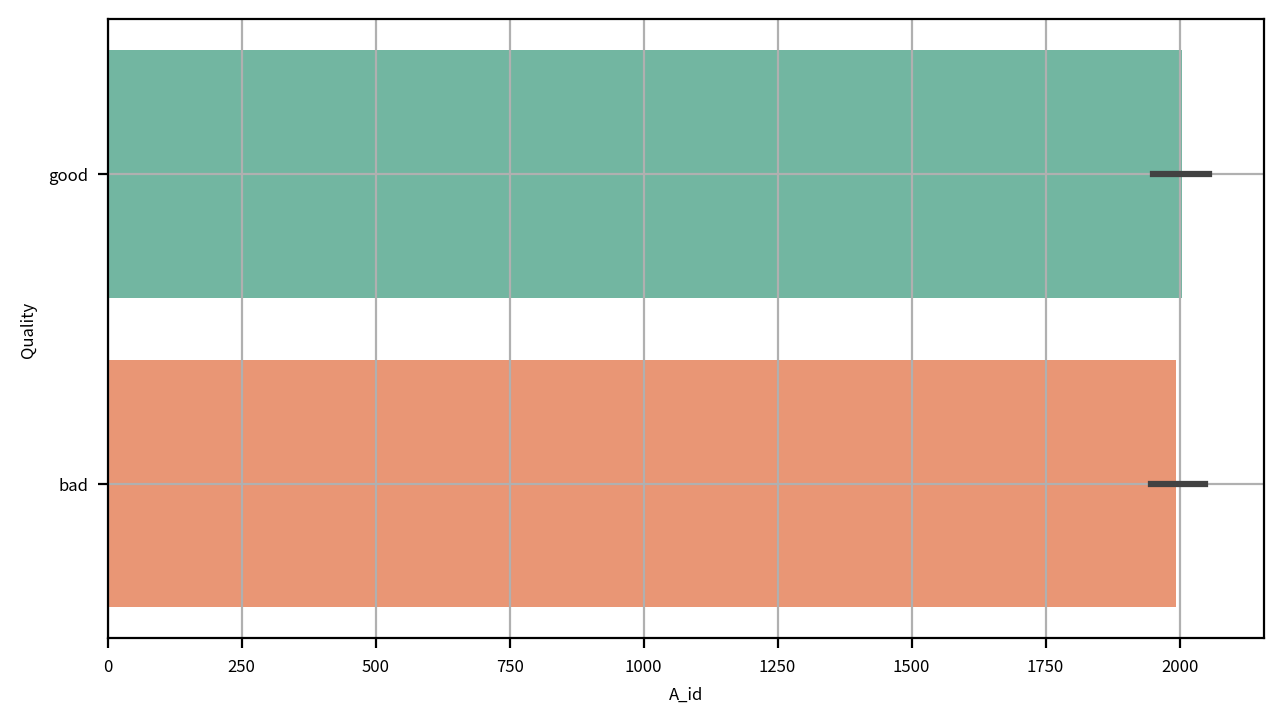

In [5]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) barplot 그리기
sb.barplot(
    data = origin, 
    x = 'A_id', 
    y = 'Quality',
    hue = 'Quality',            # 범주형 변수의 경우의 수: 남/녀
    estimator = np.mean,
    errorbar = ('ci', 95),
    palette = 'Set2'
    )

# 3) 그래프 꾸미기: 
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료